In [14]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras import Sequential, datasets
from tensorflow.keras.layers import Conv2D, Dropout, MaxPooling2D, Dense, Activation, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

In [15]:
# Load the Cifar10 dataset
(x_train, y_train), (x_test, y_test) =datasets.cifar10.load_data()


# Preprocessing the Cifar10 dataset
x_train = x_train.reshape(-1, 32, 32, 3).astype("float32")/255.0
x_test = x_test.reshape(-1, 32, 32, 3).astype("float32")/255.0

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [16]:
model = Sequential()
model.add(Conv2D(filters=64, kernel_size=(3,3), activation="relu", input_shape=(32,32,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(filters=128, kernel_size=(3,3), activation="relu"))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(filters=256, kernel_size=(3,3), activation="relu"))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(256, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax"))

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 15, 15, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 128)       73856     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 6, 6, 128)         0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 256)         295168    
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 2, 2, 256)        

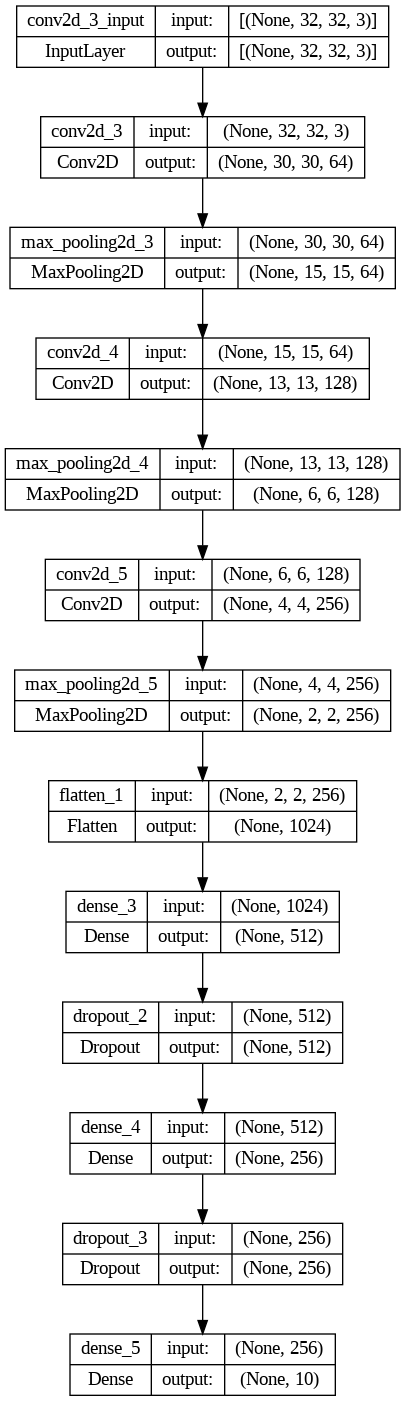

In [18]:
# Plot the model architecture to a file
from keras.utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [19]:
from datetime import datetime
Start_time_1 = datetime.now()

model.compile(optimizer =Adam(learning_rate=0.001),
             loss = CategoricalCrossentropy(),
             metrics = ["accuracy"])

In [20]:
model.fit(x_train, y_train, batch_size=512, epochs=20, validation_split=0.1)

Epoch 1/20
88/88 [==============================] - 5s 38ms/step - loss: 1.9546 - accuracy: 0.2569 - val_loss: 1.6004 - val_accuracy: 0.3974
Epoch 2/20
88/88 [==============================] - 3s 32ms/step - loss: 1.5250 - accuracy: 0.4350 - val_loss: 1.3534 - val_accuracy: 0.5162
Epoch 3/20
88/88 [==============================] - 3s 30ms/step - loss: 1.3153 - accuracy: 0.5236 - val_loss: 1.1597 - val_accuracy: 0.5878
Epoch 4/20
88/88 [==============================] - 3s 30ms/step - loss: 1.1592 - accuracy: 0.5867 - val_loss: 1.0486 - val_accuracy: 0.6172
Epoch 5/20
88/88 [==============================] - 3s 30ms/step - loss: 1.0645 - accuracy: 0.6247 - val_loss: 0.9720 - val_accuracy: 0.6524
Epoch 6/20
88/88 [==============================] - 3s 32ms/step - loss: 0.9577 - accuracy: 0.6643 - val_loss: 0.8947 - val_accuracy: 0.6810
Epoch 7/20
88/88 [==============================] - 3s 32ms/step - loss: 0.8821 - accuracy: 0.6930 - val_loss: 0.8461 - val_accuracy: 0.7058
Epoch 8/20
88

In [21]:
End_time_1 = datetime.now()

print('Time taken to train the model: {}'.format(End_time_1 - Start_time_1))

test_acc = model.evaluate(x_test, y_test)

print("Loss accuracy, Test accuracy: \n", test_acc)

Time taken to train the model: 0:01:06.067791
313/313 [==============================] - 1s 4ms/step - loss: 0.8866 - accuracy: 0.7381
Loss accuracy, Test accuracy: 
 [0.8865618109703064, 0.738099992275238]


In [22]:
model.save("cifar10_trained_runtimeT4GPU_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
